In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#valores para calculo del equilibrio
deltaS_N2O4=304.376
deltaH_N2O4=9.079*1000
deltaS_NO2=240.034
deltaH_NO2=33.095*1000
T=298.15 #temperatura en kelvin 
pt=1.0 #presion total en bar
R=8.314 #J/K-mol

In [3]:
#calcular delta G a partir de los datos que es igual al potencial u
uN2O4_est=deltaH_N2O4-T*deltaS_N2O4
uNO2_est=deltaH_NO2-T*deltaS_NO2
print(uN2O4_est,uNO2_est)

-81670.70439999999 -38471.13709999999


In [9]:
#calcular graccion molar, crear arreglo desde 0.001 a 1 
x=np.arange(0.001,1,0.001)
#moles de N2O4
n_N2O4=1-x #x es shi
n_NO2=2*x
nt=1+x
X_N2O4=n_N2O4/nt
X_NO2=n_NO2/nt

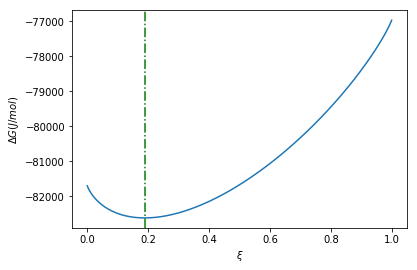

In [34]:
uN2O4=uN2O4_est+R*T*np.log(X_N2O4)
uNO2=uNO2_est+R*T*np.log(X_NO2)
#calcular uT
uT=n_N2O4*uN2O4+n_NO2*uNO2
#graficar
plt.plot(x,uT)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\Delta G (J/mol)$')
plt.axvline(x=xeq,color="green",linestyle="-.")

plt.show()  


In [11]:
minimo=np.min(uT)
n=np.where(minimo==uT)
xeq=x[n]
print(xeq)

[0.189]


In [12]:
#calcular la constante de equilibrio Kp, y primero calcular las presiones
pNO2=2*xeq/(1+xeq)*pt
pN2O4=(1-xeq)/(1+xeq)*pt
Kp=pNO2**2/pN2O4
print(Kp)


[0.14817703]


[0.189]


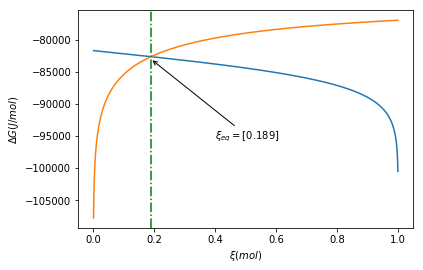

In [35]:
yy=(uN2O4-2*uNO2)**2
minimo=np.min(yy)
n=np.where(yy==minimo)
xeq=x[n]
print(xeq)
#para la grafica, se usan dos plt.plot, uno de la suma de miu de productos, y otra de reactivos
plt.plot(x,uN2O4)
plt.plot(x,2*uNO2) #segunda grafica donde se cruzan
plt.xlabel(r'$\xi (mol) $')
plt.ylabel(r'$\Delta G (J/mol)$')
plt.axvline(x=xeq,color="green",linestyle="-.") #para la linea verde
plt.annotate(r"$\xi_{eq}=$"+str(xeq), xy=(xeq,-83000),xytext=(0.4,-95000),arrowprops={'arrowstyle': '->'}, va='center')

plt.show()
#el punto donde se cruzan es el minimo calculado